In [1]:
# Ignore warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

#Process data    
import numpy as np
# import xarray as xr

#Display data 
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.vector_transform import vector_scalar_to_grid
from matplotlib.axes import Axes
import cartopy.feature as cfeature
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.image as image
import matplotlib.pyplot as plt

#Writing data files
import pandas as pd

In [2]:
#np.load('Historical_maize_maize_rainfed_irrigated_20y_1986-2005_landuse_fraction.npy',allow_pickle=True)
X=np.load('rainfed_maize_production_Xgrid.npy',allow_pickle=True)
Y=np.load('rainfed_maize_production_Ygrid.npy',allow_pickle=True)

prod2000=np.load('spam2000_rainfed_maize_production.npy',allow_pickle=True)
prod2005=np.load('spam2005_rainfed_maize_production.npy',allow_pickle=True)
prod2010=np.load('spam2010_rainfed_maize_production.npy',allow_pickle=True)

lon=np.load('spam_rainfed_maize_lon_array.npy',allow_pickle=True)
lat=np.load('spam_rainfed_maize_lat_array.npy',allow_pickle=True)

In [3]:
prod2000=np.nan_to_num(prod2000)
prod2005=np.nan_to_num(prod2005)
prod2010=np.nan_to_num(prod2010)


In [4]:
prod2000[prod2000<0]=0
prod2005[prod2005<0]=0
prod2010[prod2010<0]=0

In [5]:
lat=np.load('spam_rainfed_maize_lat_array.npy',allow_pickle=True)

In [6]:
prod2000_60x60=np.reshape(np.array([0.0]*3600),(60,60))
prod2005_60x60=np.reshape(np.array([0.0]*3600),(60,60))
prod2010_60x60=np.reshape(np.array([0.0]*3600),(60,60))

In [7]:
prod2000_60x60.shape

(60, 60)

In [8]:
for i in range(60):
    print(i)
    for j in range(60):
        x1=X[i,j]-0.25
        x2=X[i,j]+0.25
        y1=Y[i,j]-0.25
        y2=Y[i,j]+0.25
        for i1 in range(362):
            for j1 in range(362):
                if lon[i1,j1]>x1 and lon[i1,j1]<=x2 and lat[i1,j1]>y1 and lat[i1,j1]<=y2:
                    prod2000_60x60[i,j]=prod2000_60x60[i,j]+prod2000[i1,j1]
                    prod2005_60x60[i,j]=prod2005_60x60[i,j]+prod2005[i1,j1]                    
                    prod2010_60x60[i,j]=prod2010_60x60[i,j]+prod2010[i1,j1]                
                

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


In [9]:
np.save('prod2000_60x60.npy',prod2000_60x60)
np.save('prod2005_60x60.npy',prod2005_60x60)
np.save('prod2010_60x60.npy',prod2010_60x60)

In [8]:
prod2000_60x60[prod2000_60x60==0.0]=np.nan
prod2005_60x60[prod2005_60x60==0.0]=np.nan
prod2010_60x60[prod2010_60x60==0.0]=np.nan

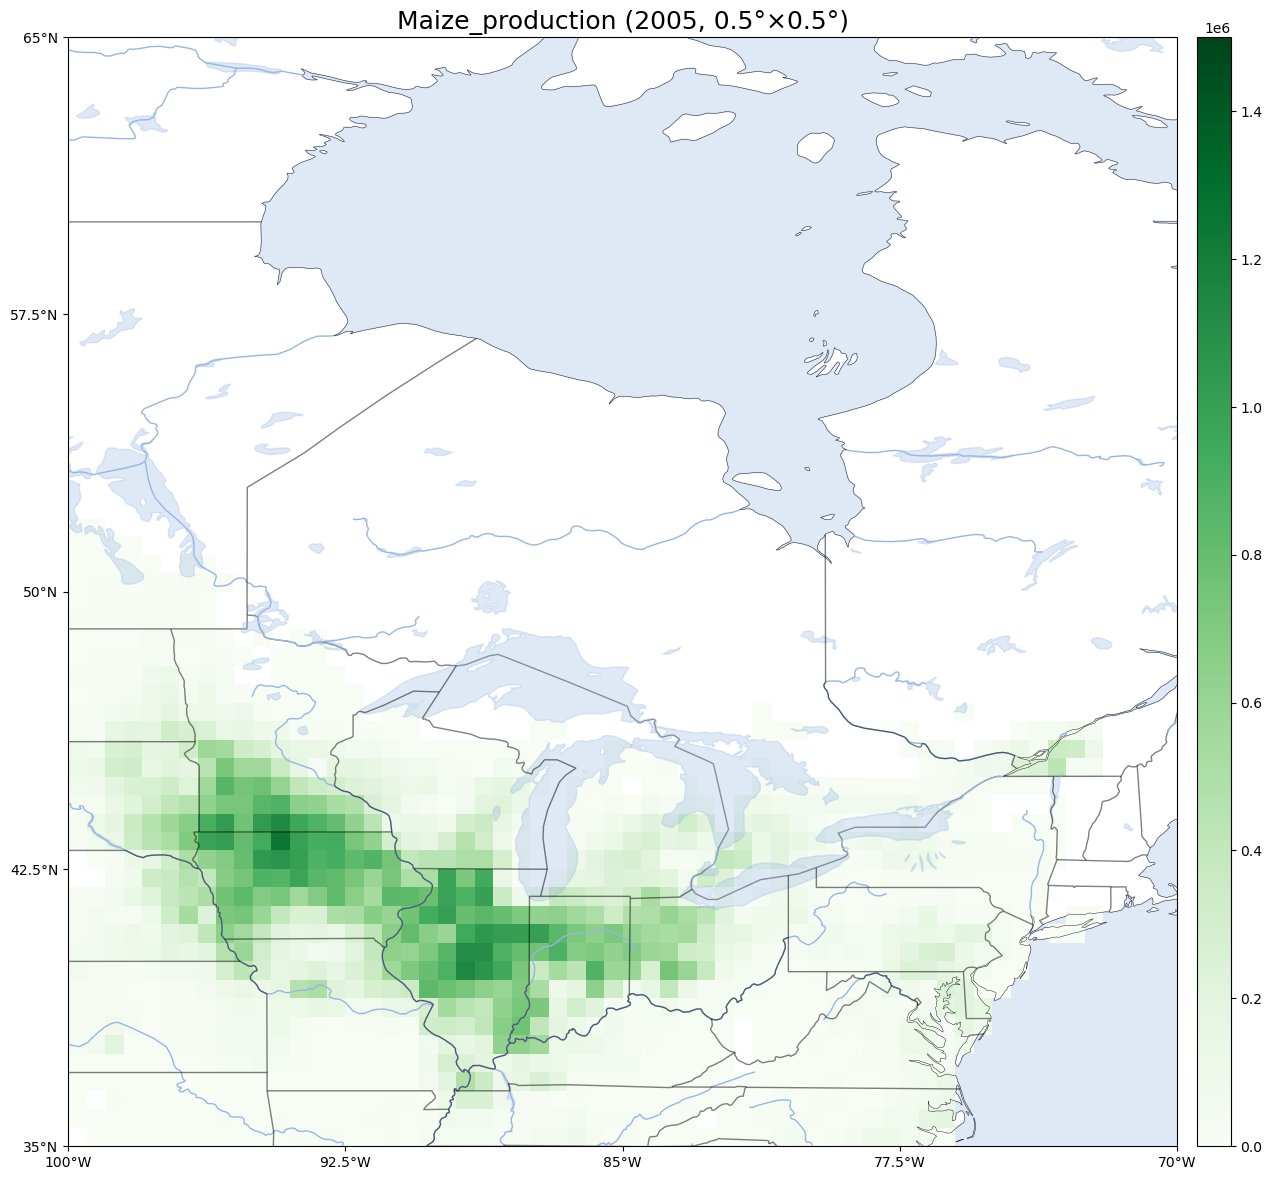

In [49]:
# lats = cropped_ds['yield-mai-noirr'].coords['lat'][:]
# lons = cropped_ds['yield-mai-noirr'].coords['lon'][:]

# ct_x=[-79.617,-75.717,-86.917,-93.783]
# ct_y=[43.667,45.383,49.767,51.067]
# ct_n=['Toronto','Ottawa','Geraldton','Red Lake']

ct_x=[-94.75,-87.75,-81.25,-73.25]
ct_y=[43.25,38.75,43.75,45.75]
ct_n=['A','B','C','D']

projection = ccrs.PlateCarree()
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')

axes_class = (GeoAxes,
              dict(map_projection=projection))

# lons, lats = np.meshgrid(lons, lats)
title_text=["season=DJF(m/s)", "season=MAM(m/s)", "season=JJA(m/s)", "season=SON(m/s)"]
fig = plt.figure(figsize=(15,15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 1),
                axes_pad=0.6,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='3%',
                label_mode='')  # note the empty labe

for i, ax in enumerate(axgr):


#*************************************************************
#add ocean, coastline,borders,lakes,rivers,provinc_bodr
    ax.add_feature(cfeature.OCEAN,alpha=0.3)
    ax.add_feature(cfeature.COASTLINE,linewidth=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    ax.add_feature(cfeature.LAKES, alpha=0.3)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(provinc_bodr, linestyle='-', linewidth=1, edgecolor="k", zorder=10, alpha=0.5)    
    ax.set_title('Maize_production (2005, 0.5°×0.5°)',fontsize=18)
    ax.set_xticks(np.linspace(-100, -70, 5), crs=projection)
    ax.set_yticks(np.linspace(35, 65, 5), crs=projection)
    ax.set_xlim([-100,-70])
    ax.set_ylim([35,65])
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
#     #ax.imshow(im, aspect='auto',extent=(-75,-70,35,37),zorder=-1)
#     ax.text(-75,37.5,"yorku.ca/ocdp",fontsize=18)
#     ax.text(-85,60,"Hudson Buy", fontsize=20,color='b',alpha=0.5)

#     ax.annotate(ct_n[0], (ct_x[0], ct_y[0]),va="top", ha="center",fontsize=14) 
#     ax.annotate(ct_n[1], (ct_x[1], ct_y[1]),va="top", ha="center",fontsize=14) 
#     ax.annotate(ct_n[2], (ct_x[2], ct_y[2]),va="top", ha="center",fontsize=14) 
#     ax.annotate(ct_n[3], (ct_x[3], ct_y[3]),va="top", ha="center",fontsize=14) 
    p = ax.pcolormesh(X, Y, prod2000_60x60,
                      vmin=0,
                      vmax=1500000,                        
                      transform=projection,
                      cmap='Greens'  )
#     p = ax.contourf(lons, lats, t1m,50,
#                         transform=projection,
#                         cmap='BrBG')
#     ax.scatter(ct_x, ct_y,transform=ccrs.PlateCarree(),color='r')
#     l = ax.contour(lons, lats, t1m,25,colors=['black'], linewidth=0.3,
#                         transform=ccrs.PlateCarree())

#     ax.clabel(
#         l,  # Typically best results when labelling line contours.
#         colors=['black'],
#         manual=False,  # Automatic placement vs manual placement.
#         inline=True,  # Cut the line where the label will be placed.
#         fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
#     )
    
axgr.cbar_axes[0].colorbar(p)
plt.show()
fig.savefig('yieds_projections_figures/spam2000_maize_rainfed_production_05X05.png',dpi=150)

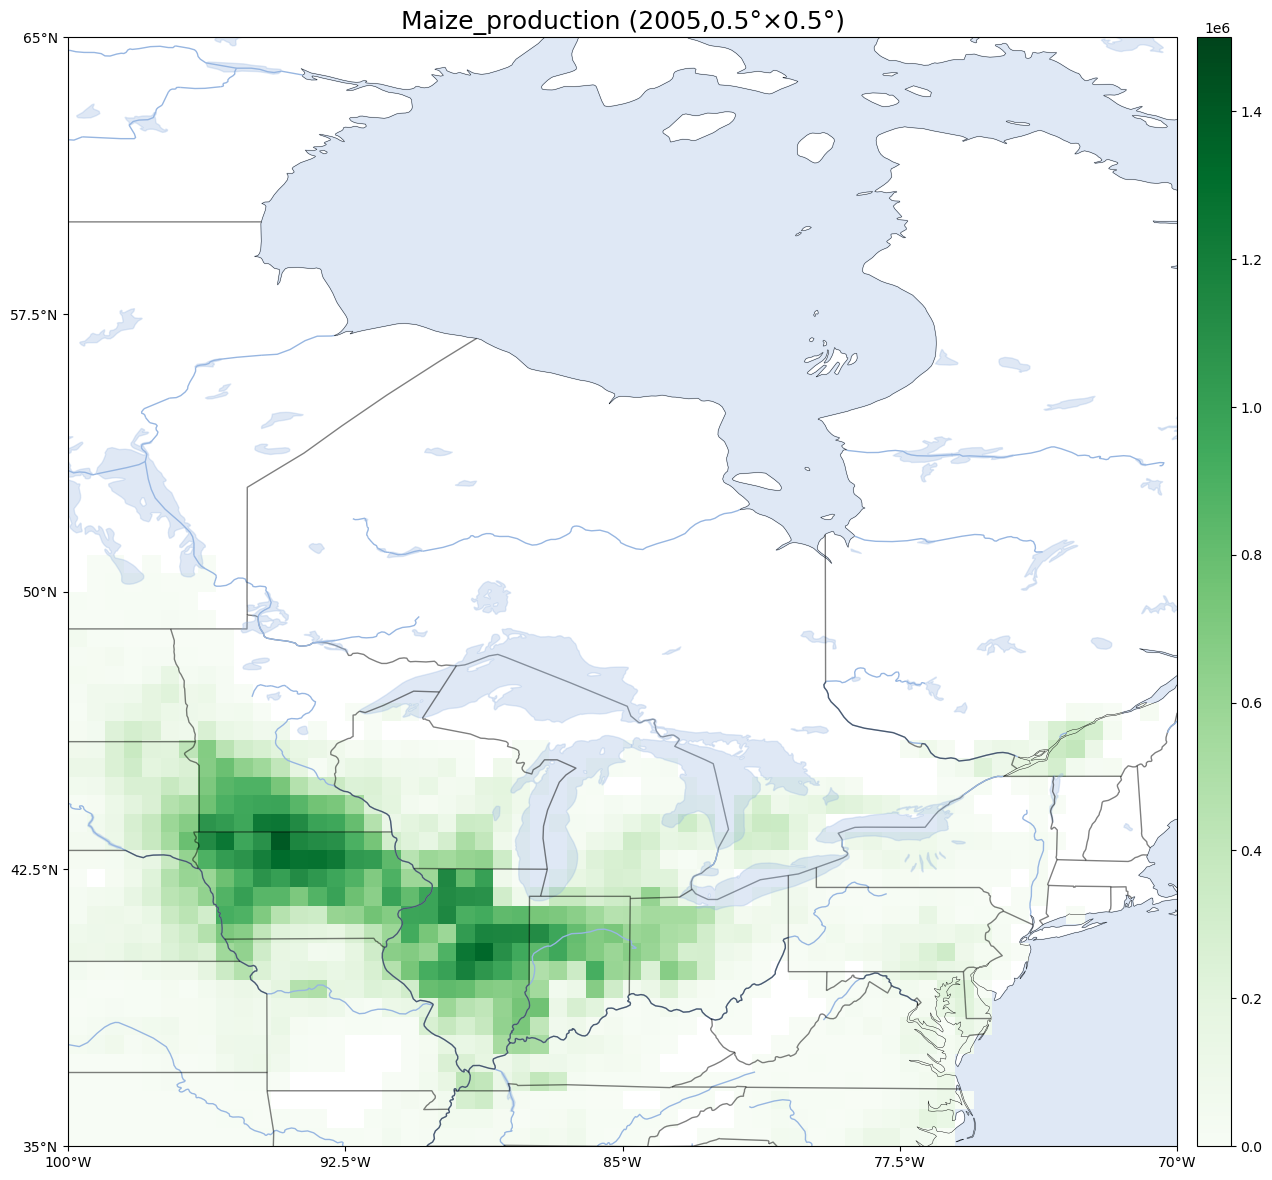

In [50]:
# lats = cropped_ds['yield-mai-noirr'].coords['lat'][:]
# lons = cropped_ds['yield-mai-noirr'].coords['lon'][:]

# ct_x=[-79.617,-75.717,-86.917,-93.783]
# ct_y=[43.667,45.383,49.767,51.067]
# ct_n=['Toronto','Ottawa','Geraldton','Red Lake']

ct_x=[-94.75,-87.75,-81.25,-73.25]
ct_y=[43.25,38.75,43.75,45.75]
ct_n=['A','B','C','D']

projection = ccrs.PlateCarree()
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')

axes_class = (GeoAxes,
              dict(map_projection=projection))

# lons, lats = np.meshgrid(lons, lats)
title_text=["season=DJF(m/s)", "season=MAM(m/s)", "season=JJA(m/s)", "season=SON(m/s)"]
fig = plt.figure(figsize=(15,15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 1),
                axes_pad=0.6,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='3%',
                label_mode='')  # note the empty labe

for i, ax in enumerate(axgr):


#*************************************************************
#add ocean, coastline,borders,lakes,rivers,provinc_bodr
    ax.add_feature(cfeature.OCEAN,alpha=0.3)
    ax.add_feature(cfeature.COASTLINE,linewidth=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    ax.add_feature(cfeature.LAKES, alpha=0.3)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(provinc_bodr, linestyle='-', linewidth=1, edgecolor="k", zorder=10, alpha=0.5)    
    ax.set_title('Maize_production (2005,0.5°×0.5°)',fontsize=18)
    ax.set_xticks(np.linspace(-100, -70, 5), crs=projection)
    ax.set_yticks(np.linspace(35, 65, 5), crs=projection)
    ax.set_xlim([-100,-70])
    ax.set_ylim([35,65])
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
#     #ax.imshow(im, aspect='auto',extent=(-75,-70,35,37),zorder=-1)
#     ax.text(-75,37.5,"yorku.ca/ocdp",fontsize=18)
#     ax.text(-85,60,"Hudson Buy", fontsize=20,color='b',alpha=0.5)

#     ax.annotate(ct_n[0], (ct_x[0], ct_y[0]),va="top", ha="center",fontsize=14) 
#     ax.annotate(ct_n[1], (ct_x[1], ct_y[1]),va="top", ha="center",fontsize=14) 
#     ax.annotate(ct_n[2], (ct_x[2], ct_y[2]),va="top", ha="center",fontsize=14) 
#     ax.annotate(ct_n[3], (ct_x[3], ct_y[3]),va="top", ha="center",fontsize=14) 
    p = ax.pcolormesh(X, Y, prod2005_60x60,
                      vmin=0,
                      vmax=1500000,                          
                      transform=projection,
                      cmap='Greens'  )
#     p = ax.contourf(lons, lats, t1m,50,
#                         transform=projection,
#                         cmap='BrBG')
#     ax.scatter(ct_x, ct_y,transform=ccrs.PlateCarree(),color='r')
#     l = ax.contour(lons, lats, t1m,25,colors=['black'], linewidth=0.3,
#                         transform=ccrs.PlateCarree())

#     ax.clabel(
#         l,  # Typically best results when labelling line contours.
#         colors=['black'],
#         manual=False,  # Automatic placement vs manual placement.
#         inline=True,  # Cut the line where the label will be placed.
#         fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
#     )
    
axgr.cbar_axes[0].colorbar(p)
plt.show()
fig.savefig('yieds_projections_figures/spam2005_maize_rainfed_production_05X05.png',dpi=150)

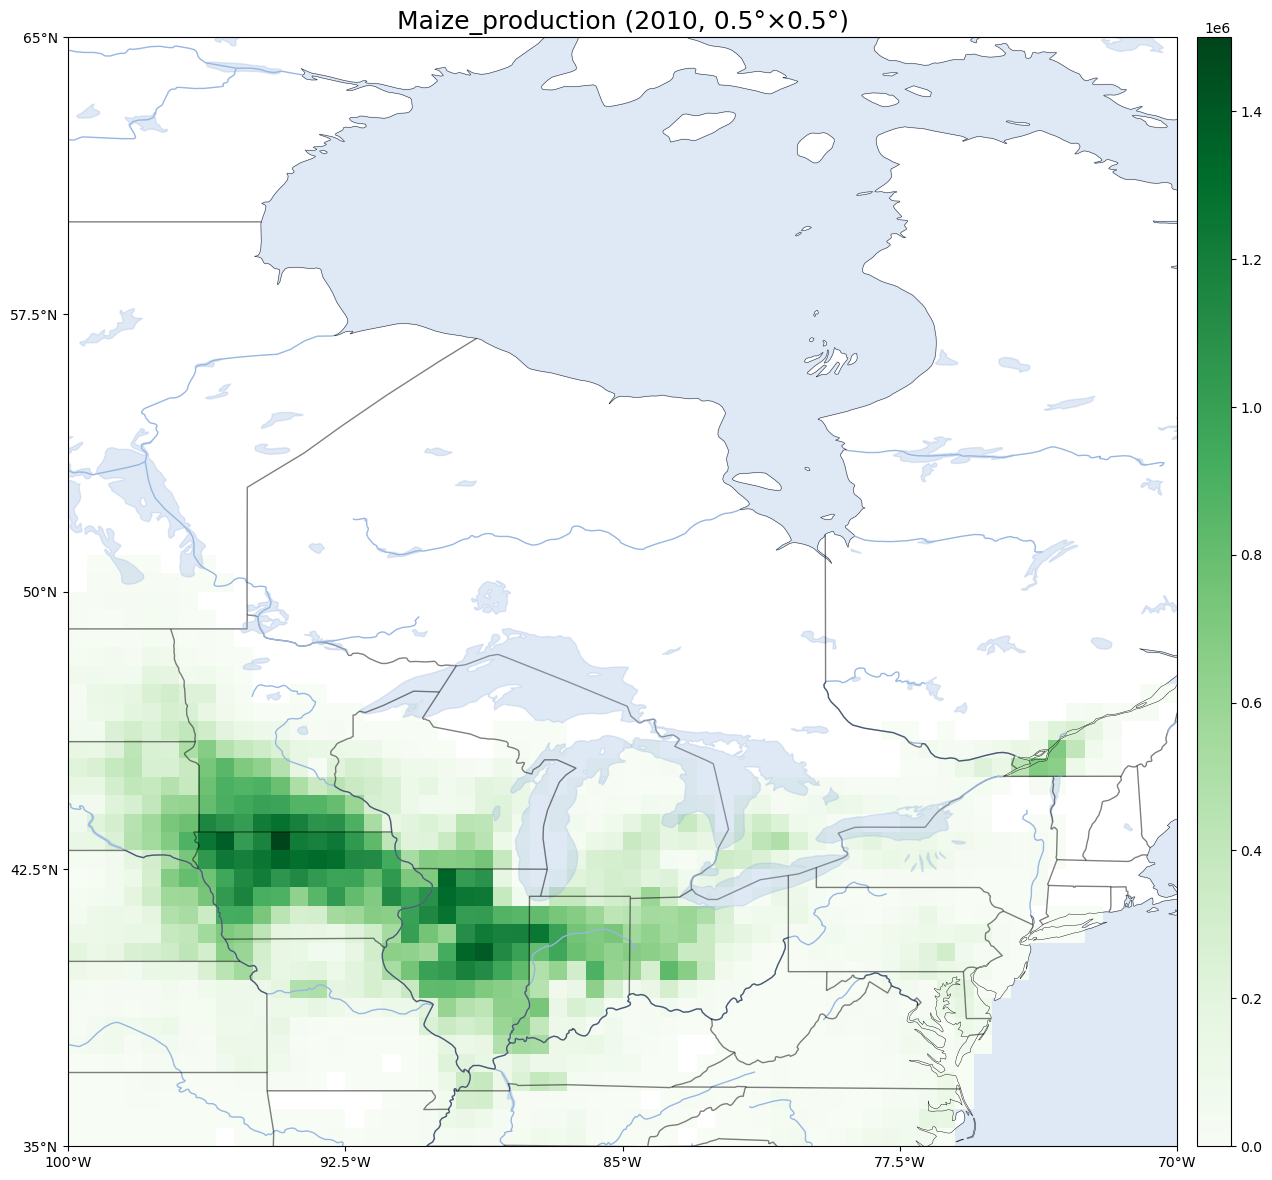

In [51]:
# lats = cropped_ds['yield-mai-noirr'].coords['lat'][:]
# lons = cropped_ds['yield-mai-noirr'].coords['lon'][:]

# ct_x=[-79.617,-75.717,-86.917,-93.783]
# ct_y=[43.667,45.383,49.767,51.067]
# ct_n=['Toronto','Ottawa','Geraldton','Red Lake']

ct_x=[-94.75,-87.75,-81.25,-73.25]
ct_y=[43.25,38.75,43.75,45.75]
ct_n=['A','B','C','D']

projection = ccrs.PlateCarree()
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')

axes_class = (GeoAxes,
              dict(map_projection=projection))

# lons, lats = np.meshgrid(lons, lats)
title_text=["season=DJF(m/s)", "season=MAM(m/s)", "season=JJA(m/s)", "season=SON(m/s)"]
fig = plt.figure(figsize=(15,15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 1),
                axes_pad=0.6,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='3%',
                label_mode='')  # note the empty labe

for i, ax in enumerate(axgr):


#*************************************************************
#add ocean, coastline,borders,lakes,rivers,provinc_bodr
    ax.add_feature(cfeature.OCEAN,alpha=0.3)
    ax.add_feature(cfeature.COASTLINE,linewidth=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    ax.add_feature(cfeature.LAKES, alpha=0.3)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(provinc_bodr, linestyle='-', linewidth=1, edgecolor="k", zorder=10, alpha=0.5)    
    ax.set_title('Maize_production (2010, 0.5°×0.5°)',fontsize=18)
    ax.set_xticks(np.linspace(-100, -70, 5), crs=projection)
    ax.set_yticks(np.linspace(35, 65, 5), crs=projection)
    ax.set_xlim([-100,-70])
    ax.set_ylim([35,65])
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
#     #ax.imshow(im, aspect='auto',extent=(-75,-70,35,37),zorder=-1)
#     ax.text(-75,37.5,"yorku.ca/ocdp",fontsize=18)
#     ax.text(-85,60,"Hudson Buy", fontsize=20,color='b',alpha=0.5)

#     ax.annotate(ct_n[0], (ct_x[0], ct_y[0]),va="top", ha="center",fontsize=14) 
#     ax.annotate(ct_n[1], (ct_x[1], ct_y[1]),va="top", ha="center",fontsize=14) 
#     ax.annotate(ct_n[2], (ct_x[2], ct_y[2]),va="top", ha="center",fontsize=14) 
#     ax.annotate(ct_n[3], (ct_x[3], ct_y[3]),va="top", ha="center",fontsize=14) 
    p = ax.pcolormesh(X, Y, prod2010_60x60,
                       vmin=0,
                       vmax=1500000,                      
                      transform=projection,
                      cmap='Greens'  )
#     p = ax.contourf(lons, lats, t1m,50,
#                         transform=projection,
#                         cmap='BrBG')
#     ax.scatter(ct_x, ct_y,transform=ccrs.PlateCarree(),color='r')
#     l = ax.contour(lons, lats, t1m,25,colors=['black'], linewidth=0.3,
#                         transform=ccrs.PlateCarree())

#     ax.clabel(
#         l,  # Typically best results when labelling line contours.
#         colors=['black'],
#         manual=False,  # Automatic placement vs manual placement.
#         inline=True,  # Cut the line where the label will be placed.
#         fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
#     )
    
axgr.cbar_axes[0].colorbar(p)
plt.show()
fig.savefig('yieds_projections_figures/spam2010_maize_rainfed_production_05X05.png',dpi=150)

In [44]:
np.nanmax(prod2010_60x60)

1499284.58984375